# Table of Contents

1. [Logistic Regression](#logreg)
    1. [Visualizing the data](#plot)
    2. [Implementation](#implementation)
        1. [Warmup exercise: sigmoid function](#sigmoid)
        2. [Cost function and gradient](#gradient)
        3. [Learning parameters using optimization](#optimization)
2. [Regularized logistic regression](#reglogreg)
    1. [Visualizing the data](#plotreg)
    2. [Feature mapping](#mapf)
    3. [Cost function and gradient](#cost-gradient)
        1. [Learning parameters using optimization](#reg-optimization)
    4. [Plotting the decision boundary](#boundary)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div id='logreg'/>

## 1. Logistic Regression

In [2]:
# import the data 
data_directory = '~/Documents/Machine-Learning/Week 3/01. Data/'
file = 'ex2data1.txt'
df = pd.read_csv(data_directory+file, names = ['exam_1','exam_2', 'admit'])

In [3]:
df.head()

,exam_1,exam_2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,exam_1,exam_2,admit
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
# separate the independent variables and the target variable

X = df[['exam_1', 'exam_2']]
X.insert(0, 'int', 1)
Y = df[['admit']]

<div id='plot'/>

### 1.1 Visualizing the data

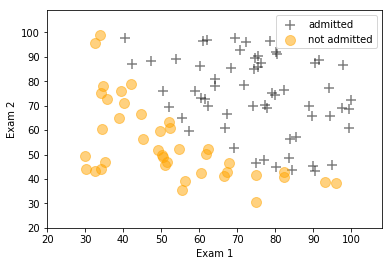

In [6]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['exam_1'].loc[df['admit'] == 1], df['exam_2'].loc[df['admit'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['exam_1'].loc[df['admit'] == 0], df['exam_2'].loc[df['admit'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(20,108)
plt.ylim(20,109)

plt.legend((y,n), ('admitted','not admitted'), loc='upper right')

plt.show()

<div id='implementation'/>

### 1.2 Implementation

<div id='sigmoid'/>

#### 1.2.1 Warmup exercise: sigmoid function

The logistic regression hypothesis is defined by:

$$ h_{\theta}(x) = g(\theta^Tx) $$

where the function $g$ is the sigmoid function defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$



In [7]:
# define the sigmiod function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

In [8]:
# lets try the sigmoid function
print('With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is {}'.format(round(sigmoid(2),2)))
print('With a value of z=2, the sigmoid function should be equal to 0.5. It is {}'.format(sigmoid(0)))
print('With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is {}'.format(round(sigmoid(-2),2)))

With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is 0.88
With a value of z=2, the sigmoid function should be equal to 0.5. It is 0.5
With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is 0.12


<div id='gradient'/>

#### 1.2.2 Cost function and gradient

The cost function in logistic regression is:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)})\big] $$

THe gradient of the cost $J$ is a vector of the same length as $\theta$ and every element of this vector is defined as:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$

In [9]:
# define a function which returns both the cost and the gradient for logistic regression

def costFunction(theta, x, y):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    J = 1/m * sum( -1*y.values.transpose()[0]*np.log(h) - ((1-y.values.transpose()[0])*np.log(1-h)))
    return(J)

def gradient(theta, x, y):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    grad = 1/m * np.array(np.transpose(np.transpose(x) * np.transpose(h-y.values.transpose()[0])).sum())
    return(grad)

In [10]:
# compute with initial values of zero for all theta
initial_theta = np.zeros(X.shape[1])

cost = costFunction(initial_theta,X,Y)
grad = gradient(initial_theta,X,Y)

In [11]:
print('Cost at initial theta (zeros): {}\nExpected cost (approx): 0.693'.format(cost))

Cost at initial theta (zeros): 0.693147180559946
Expected cost (approx): 0.693


In [12]:
print('Gradient at initial theta (zeros): {}\nExpected gradients (approx): -0.1000, -12.0092, -11.2628'.format(grad))

Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): -0.1000, -12.0092, -11.2628


In [13]:
# compute with initial values of theta different from zero

test_theta = np.array([-24,0.2,0.2])
test_cost = costFunction(test_theta,X,Y)
test_grad = gradient(test_theta,X,Y)

In [14]:
print('Cost at test theta: {}\nExpected cost (approx): 0.218'.format(test_cost))

Cost at test theta: 0.21833019382659785
Expected cost (approx): 0.218


In [15]:
print('Gradient at test theta: {}\nExpected gradients (approx):0.043, 2.566, 2.647'.format(test_grad))

Gradient at test theta: [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):0.043, 2.566, 2.647


<div id='optimization'/>

#### 1.2.3 Learning parameters using optimization


In [16]:
from scipy.optimize import minimize

res = minimize(fun = costFunction, jac = gradient, x0 = initial_theta, args = (X, Y), method = 'TNC')
print(res)

     fun: 0.20349770158947486
     jac: array([9.22161957e-09, 1.05799597e-07, 4.83191247e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131855,   0.20623159,   0.20147149])


In [17]:
print('Cost at theta found by optimization: {}'.format(res.fun))
print('Expected cost (approx): 0.203')

Cost at theta found by optimization: 0.20349770158947486
Expected cost (approx): 0.203


In [18]:
print('Theta parameters found by optimization are: {}'.format(res.x))
print('Expected theta (approx): -25.161, 0.206, 0.201')

Theta parameters found by optimization are: [-25.16131855   0.20623159   0.20147149]
Expected theta (approx): -25.161, 0.206, 0.201


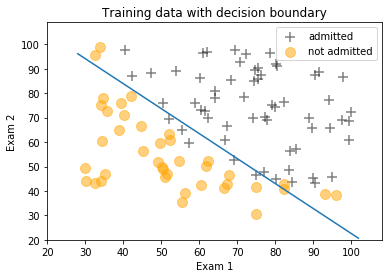

In [19]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['exam_1'].loc[df['admit'] == 1], df['exam_2'].loc[df['admit'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['exam_1'].loc[df['admit'] == 0], df['exam_2'].loc[df['admit'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plot_x = np.array([min(X.iloc[:,1].values)-2, max(X.iloc[:,1].values)+2])
plot_y = (-1/res.x[2]) * (res.x[1] *plot_x + res.x[0])
plt.plot(plot_x, plot_y)
    
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(20,108)
plt.ylim(20,109)

plt.title('Training data with decision boundary')
plt.legend((y,n), ('admitted','not admitted'), loc='upper right')

plt.show()

<div id='reglogreg'/>

## 2. Regularized logistic regression

In [20]:
# import the data
file = 'ex2data2.txt'
df = pd.read_csv(data_directory + file, names = ['test1','test2','accept'])

In [21]:
df.head()

,test1,test2,accept
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [22]:
df.describe()

,test1,test2,accept
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [23]:
X = df[['test1', 'test2']]

Y = df[['accept']]

<div id='plotreg'/>

### 2.1 Visualizing the data

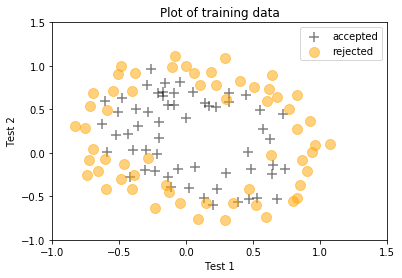

In [24]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['test1'].loc[df['accept'] == 1], df['test2'].loc[df['accept'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['test1'].loc[df['accept'] == 0], df['test2'].loc[df['accept'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plt.xlabel('Test 1')
plt.ylabel('Test 2')

plt.xlim(-1,1.5)
plt.ylim(-1,1.5)

plt.title('Plot of training data')
plt.legend((y,n), ('accepted','rejected'), loc='upper right')

plt.show()

<div id='mapf'/>

### 2.2 Feature mapping

In [25]:
# function taken from https://github.com/arturomp/coursera-machine-learning-in-python/blob/master/mlclass-ex2-004/mlclass-ex2/mapFeature.py

def mapFeature(x1, x2):
    degree = 6
    out = np.ones((len(x1), sum(range(degree + 2)) )) # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    curr_column = 0
    for i in range(degree+1):
        for j in range(i+1):
            out[:,curr_column] = np.power(x1,i-j) * np.power(x2,j)
            curr_column += 1
    return(out)

In [27]:
# perform the feature mapping
X = mapFeature(X.values[:,0], X.values[:,1])

# create a vector of 0 for initial values of theta
initial_theta = np.zeros(X.shape[1])

# set the regularization parameter lambda to 1
lam = 1

<div id='cost-gradient'/>

### 2.3 Cost function and gradient

The regularized cost function is:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)})\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

And the gradient of the cost function $J(\theta_j)$ for $j=0$ and $j \ge 0$ is respectively:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \bigg(\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}\bigg) + \frac{\lambda}{m}\theta_j $$


In [28]:
def costFunctionReg(theta, x, y, lam):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    J = 1/m * sum( -1*y.values.transpose()[0]*np.log(h) - ((1-y.values.transpose()[0])*np.log(1-h))) + lam/(2*m)*sum(np.power(theta,2))
    return(J)

def gradientReg(theta, x, y, lam):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    grad = np.zeros(theta.shape[0])
    for i in range(len(theta)):
        if i == 0:
            grad[i] = 1/m * np.array(np.transpose(np.transpose(x[0:,i]) * np.transpose(h-y.values.transpose()[0])).sum())
        else:    
            grad[i] = (1/m * np.array(np.transpose(np.transpose(x[0:,i]) * np.transpose(h-y.values.transpose()[0])).sum())) + (lam/m)*theta[i]
    return(grad)

In [29]:
reg_cost = costFunctionReg(initial_theta, X, Y, lam)
print('Cost at initial theta (zeros): {}'.format(reg_cost))
print('Expected cost (approx): 0.693')

Cost at initial theta (zeros): 0.6931471805599461
Expected cost (approx): 0.693


In [30]:
reg_gradient = gradientReg(initial_theta, X, Y, lam)

np.set_printoptions(suppress=True) #prevent numpy exponential )
print('Gradient at test theta - first five values only: {}'.format(reg_gradient[0:5]))
print('Expected gradients (approx) - first five values only: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115')

Gradient at test theta - first five values only: [0.00847458 0.01878809 0.00007777 0.05034464 0.01150133]
Expected gradients (approx) - first five values only: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115


In [31]:
# perform additional tests

test_theta = np.ones(X.shape[1])
lam = 10
test_cost = costFunctionReg(test_theta, X, Y, lam = 10)
test_gradient = gradientReg(test_theta, X, Y, lam = 10)

In [32]:
print('Cost at test theta (with lambda = 10): {}'.format(test_cost))
print('Expected cost (approx): 3.16')

print('Gradient at test theta - first five values only: {}'.format(test_gradient[0:5]))
print('Expected gradients (approx) - first five values only: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922')

Cost at test theta (with lambda = 10): 3.2068822129709424
Expected cost (approx): 3.16
Gradient at test theta - first five values only: [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922


<div id='reg-optimization'/>

#### 2.3.1 Learning parameters using optimization

In [33]:
from scipy.optimize import minimize

lam = 1
res = minimize(fun = costFunctionReg, jac = gradientReg, x0 = initial_theta, args = (X, Y, lam), method = 'TNC')
print(res)

     fun: 0.5357749502031236
     jac: array([ 0.00135344,  0.00053155,  0.0020639 ,  0.00038798,  0.00080444,
        0.0018786 ,  0.00024891,  0.00043408,  0.00019309,  0.00117386,
        0.00013916,  0.00002709,  0.0001858 ,  0.00036803,  0.00100979,
        0.00027566,  0.00013406, -0.00009447,  0.00020905,  0.00024607,
        0.00068942,  0.00018231, -0.0000201 ,  0.00002317, -0.00002461,
        0.000114  ,  0.00026951,  0.00064187])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 54
     nit: 3
  status: 1
 success: True
       x: array([ 1.25441469,  0.6227677 ,  1.1924277 , -2.00505517, -0.87290715,
       -1.36184282,  0.12573829, -0.35536848, -0.35603639, -0.17096347,
       -1.45784642, -0.0668334 , -0.61498637, -0.25080286, -1.18096035,
       -0.22566845, -0.20562893, -0.06382342, -0.27187032, -0.27658998,
       -0.46836101, -1.03247398,  0.0162758 , -0.29695283,  0.00581069,
       -0.32631645, -0.12073386, -0.93023104])


<div id='boundary'/>

### 2.4 Plotting the decision boundary

In [42]:
# define the grid space
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros(( len(u), len(v) ))
        
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),res.x)
        
z = np.transpose(z) # important to transpose z before calling contour

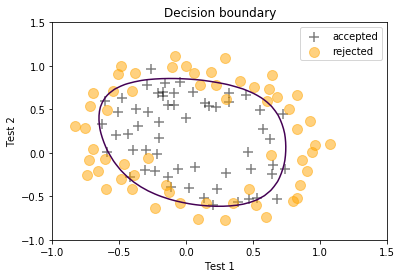

In [44]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['test1'].loc[df['accept'] == 1], df['test2'].loc[df['accept'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['test1'].loc[df['accept'] == 0], df['test2'].loc[df['accept'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)
bound = plt.contour(u, v, z, levels=[0], linewidth=2)

plt.xlabel('Test 1')
plt.ylabel('Test 2')

plt.xlim(-1,1.5)
plt.ylim(-1,1.5)

plt.title('Decision boundary')
plt.legend((y,n), ('accepted','rejected'), loc='upper right')
# plt.legend((p1,p2, p3),('y = 1', 'y = 0', 'Decision Boundary'), numpoints=1, handlelength=0)
plt.show()